# Correlação e Regressão Simples/Multivariada

# Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?
2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?
3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?
4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?
5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?
6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA

In [211]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot 
import statsmodels.api as sm
import statsmodels.formula.api as sm2

import warnings

from scipy.stats import f_oneway

### Análises iniciais

In [2]:
house_data = pd.read_csv("kc_house_data.csv")
house_data.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [31]:
print(house_data.shape)

(9999, 21)


In [25]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


### Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [3]:
numeric_var = house_data.select_dtypes(include=np.number)
numeric_var.shape

(9999, 19)

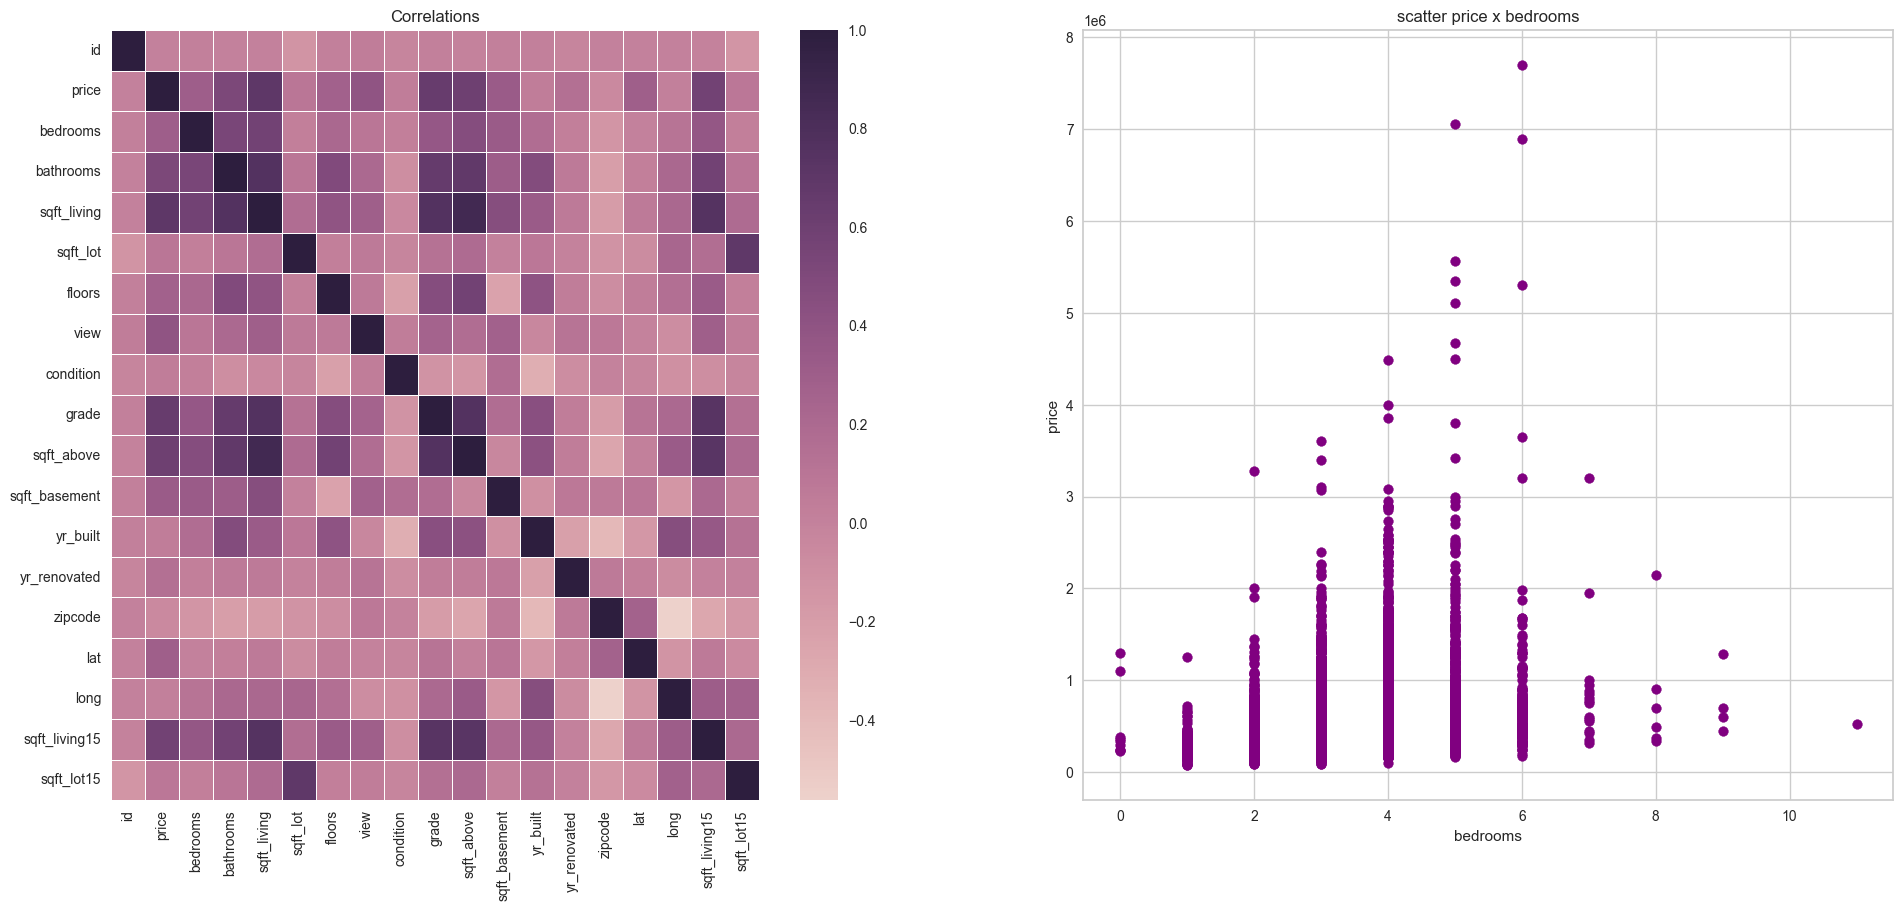

In [16]:
corr = numeric_var.corr()

# Criando a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 10))

# Plotando o heatmap na primeira posição dos eixos
sns.heatmap(corr,cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.6, linecolor='white', annot=False, fmt='.2f', ax=ax1)
ax1.set_title("Correlations")

# Plotando o gráfico de dispersão na segunda posição dos eixos
ax2.scatter(x=numeric_var['bedrooms'], y=numeric_var['price'], color='purple')
ax2.set_xlabel("bedrooms")
ax2.set_ylabel("price")
ax2.set_title("scatter price x bedrooms")

# Mostrando o gráfico
plt.show()

<b>A correlação entre o preço e a quantidade de quartos resulta em 0.29, isso indica uma correlação fraca positiva entre as variáveis, sendo o coeficiente de determinação R^2 0.841, apenas 8.41% da variável bedrooms pode explicar o preço das casas.

Text(0.5, 1.0, 'Matriz de correlação com square feet living acima de 2000')

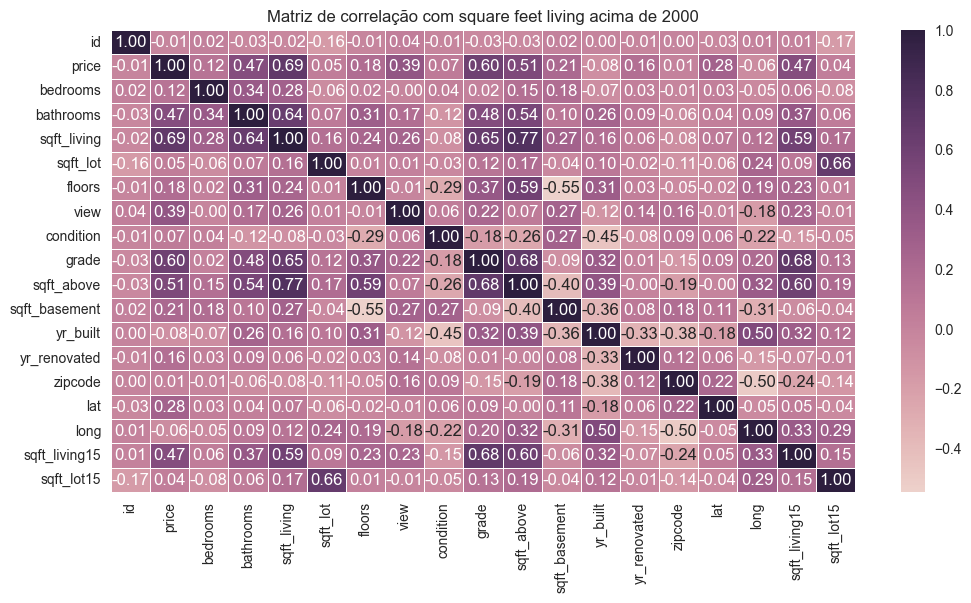

In [10]:
sqft_living_superior = numeric_var[numeric_var["sqft_living"] > 2000]

sqft_living_superior = sqft_living_superior.corr()

plt.figure(figsize=(12,6))
sns.heatmap(sqft_living_superior, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.2f',linewidths=0.6)
plt.title("Matriz de correlação com square feet living acima de 2000")

<b>Não existe correlação, ela diminui para 0.12

### Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

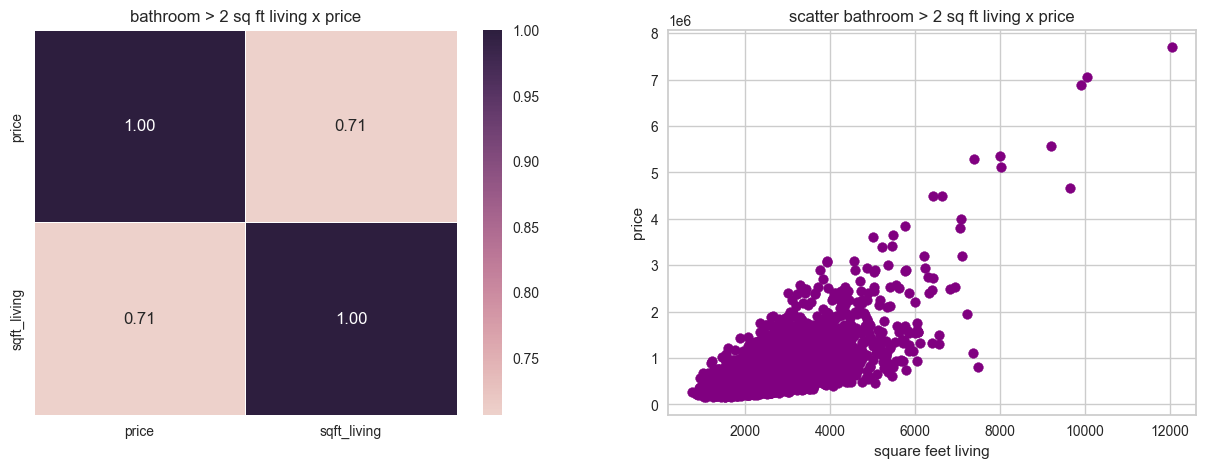

In [9]:
house_bathrooms = numeric_var[["price", "sqft_living"]].loc[numeric_var['bathrooms'] >= 2]
house_bathrooms_corr = house_bathrooms.corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(house_bathrooms_corr, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.6, fmt='0.2f', annot=True, ax=ax1)
ax1.set_title("bathroom > 2 sq ft living x price")

ax2.scatter(x=house_bathrooms['sqft_living'], y=house_bathrooms['price'], color='purple')
ax2.set_xlabel("square feet living")
ax2.set_ylabel("price")
ax2.set_title("scatter bathroom > 2 sq ft living x price")

plt.show()

<b>Sim, a relação de price x square feet living indica uma correlação de moderada a forte positiva (enquanto a área da casa aumentar o preço irá acompanhar) de 0.71, com coeficiente de determinação 0.5041, onde 50.41% da variável independente pode explicar a variável dependente.

### Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

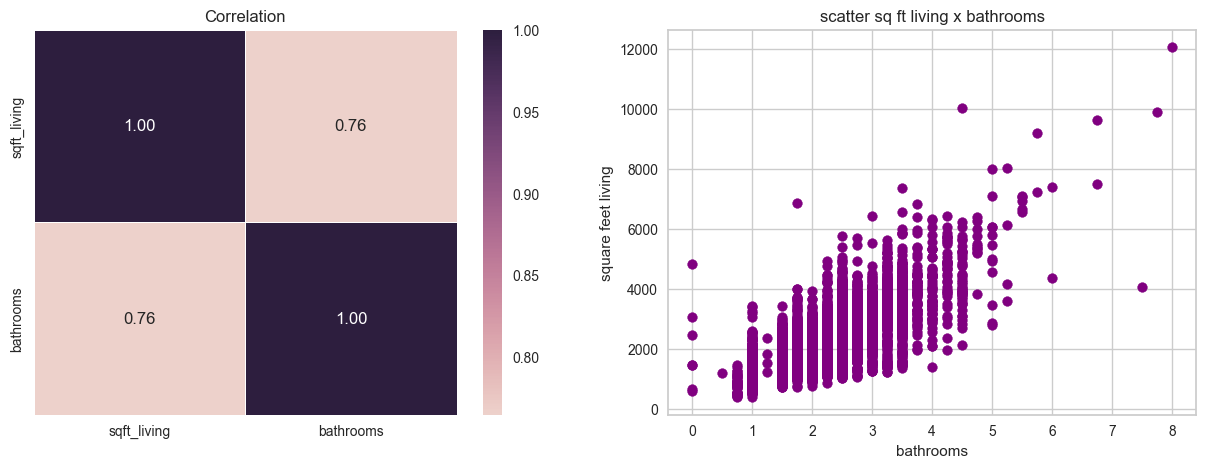

In [8]:
# Calculando a correlação
house_bathrooms2 = numeric_var[["sqft_living", 'bathrooms']]
house_bathrooms_corr2 = house_bathrooms2.corr()

# Criando a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotando o heatmap na primeira posição dos eixos
sns.heatmap(house_bathrooms_corr2, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.6, fmt='0.2f', annot=True, ax=ax1)
ax1.set_title("Correlation")

# Plotando o gráfico de dispersão na segunda posição dos eixos
ax2.scatter(x=house_bathrooms2['bathrooms'], y=house_bathrooms2['sqft_living'], color='purple')
ax2.set_xlabel("bathrooms")
ax2.set_ylabel("square feet living")
ax2.set_title("scatter sq ft living x bathrooms")

# Mostrando o gráfico
plt.show()

<b>No exercício anterior observamos que com o aumento da área temos o aumento do preco do imóvel, com os gráficos acima observamos uma relação forte positiva (XY aumentando paralelamente) de 0.76 entre área e banheiro, podemos concluir que com mais banheiros na casa temos a demanda do aumento de sua área, com o aumento da área como visto anteriormente temos a inflação do preço, como um efeito cascata.

### Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [4]:
sqft_living_superior2 = numeric_var[['price','condition']].loc[numeric_var["sqft_living"] > 3000]
sqft_living_superior2_corr = sqft_living_superior2.corr()

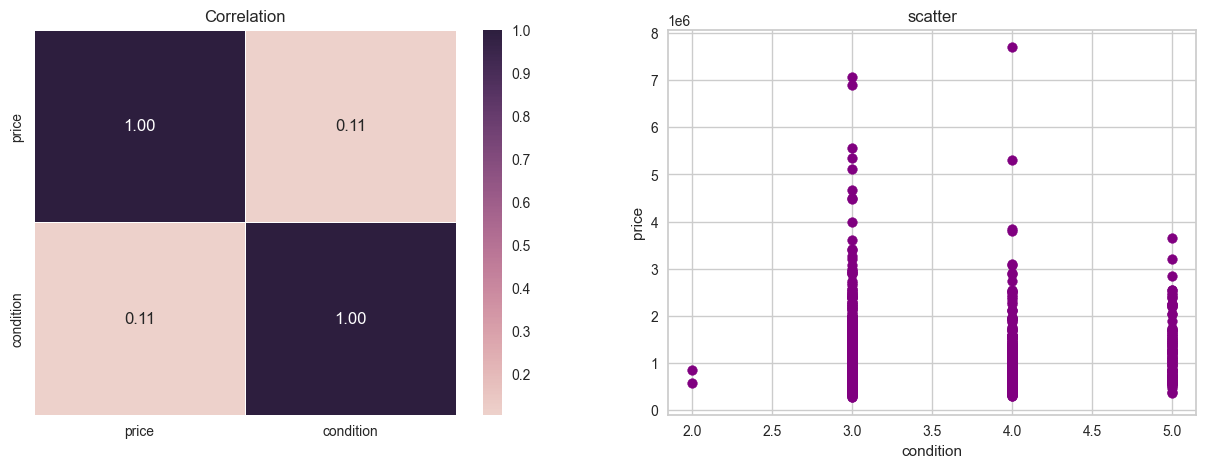

In [7]:
# Criando a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotando o heatmap na primeira posição dos eixos
sns.heatmap(sqft_living_superior2_corr, cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.6, fmt='0.2f', annot=True, ax=ax1)
ax1.set_title("Correlation")

# Plotando o gráfico de dispersão na segunda posição dos eixos
ax2.scatter(x=sqft_living_superior2['condition'], y=sqft_living_superior2['price'], color='purple')
ax2.set_xlabel("condition")
ax2.set_ylabel("price")
ax2.set_title("scatter")

# Mostrando o gráfico
plt.show()

<b>Correlação fraca de 0.11, a condição da casa não influencia em seu preço, casas com condições 2 e 5 podem apresentar o mesmo preço.

### Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [18]:
three_bedroom = numeric_var[['price','lat','long']].loc[numeric_var["bedrooms"] >= 3]
three_bedroom.head(3)

,price,lat,long
0,221900.0,47.5112,-122.257
1,538000.0,47.7210,-122.319
3,604000.0,47.5208,-122.393


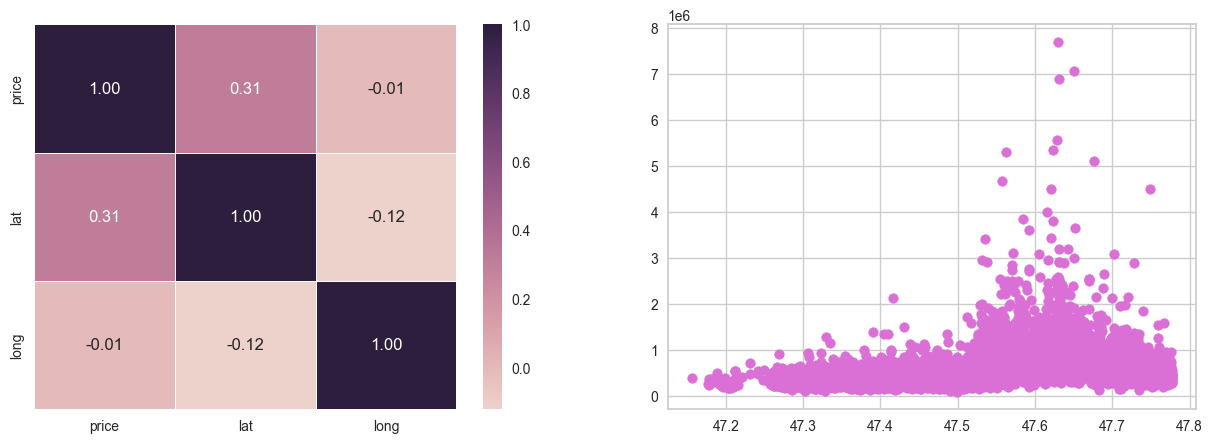

<Figure size 1500x500 with 0 Axes>

In [30]:
three_bedroom_corr = three_bedroom.corr()

figsize, (ax1,ax2)  = plt.subplots(1,2, figsize=(15,5))
plt.figure(figsize=(15,5))
sns.heatmap(three_bedroom_corr, annot=True, fmt='.2f',linewidth=0.6, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax1)

ax2.scatter(x=three_bedroom['lat'], y=three_bedroom['price'], color='orchid')

<b>As relações entre preço e latitude/longitude ambas são fracas, latitude um pouco acima apresentando uma correlação positiva moderada de 0.31.

### Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA

In [35]:
#media a beira mar e não beira mar

house_data['waterfront'].value_counts().reset_index()

,index,waterfront
0,n,9920
1,y,79


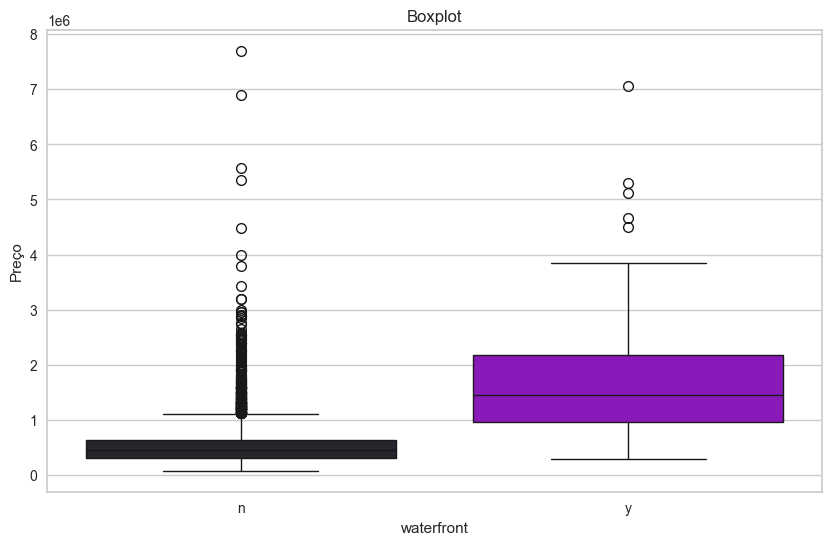

In [48]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=house_data, hue='waterfront',color='darkviolet')
plt.title('Boxplot')
plt.ylabel('Preço')
plt.show()

<b><span style="color:red"> H0 = Não há relação do preço com imovéis a beira mar </span><br>
<span style="color:green"> Ha = O preço está relacionado com o fator beira mar </span>

In [61]:
waterfront_yes_factor = house_data['price'].loc[house_data['waterfront'] == 'y']
waterfront_no_factor = house_data['price'].loc[house_data['waterfront'] != 'y']

f_stat, p_value = f_oneway(waterfront_yes_factor, waterfront_no_factor)

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. O preço está relacionado com o fator beira mar.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os preços não estão relacionados com o fator beira mar.")

Rejeitamos a hipótese nula. O preço está relacionado com o fator beira mar.


In [73]:
d1 = waterfront_yes_factor.describe().reset_index()
d2 = waterfront_no_factor.describe().reset_index().drop('index',axis=1)

d3 = pd.concat([d1,d2],ignore_index=True,axis=1)
d3.columns = [['Medidas','waterfront yes price', 'waterfront no price']]
d3

,Medidas,waterfront yes price,waterfront no price
0,count,7.900000e+01,9.920000e+03
1,mean,1.786740e+06,5.234557e+05
2,std,1.287249e+06,3.430194e+05
3,min,2.900000e+05,7.500000e+04
4,25%,9.549750e+05,3.150000e+05
5,50%,1.450000e+06,4.450000e+05
6,75%,2.175000e+06,6.350000e+05
7,max,7.060000e+06,7.700000e+06


# Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.
8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.
9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.
10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.
11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

### Leituras iniciais

In [89]:
cars = pd.read_csv('car_price.csv')
display(cars.head(3))
print('-------------')
print('Linhas x Colunas\n{}'.format(cars.shape))
print('-------------')
print(cars.info())
display(cars.describe())

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


-------------
Linhas x Colunas
(1874, 20)
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15 

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


### Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

In [128]:
cars_numeric = cars.select_dtypes(include=np.number)
cars_numeric_corr = cars_numeric.corr()

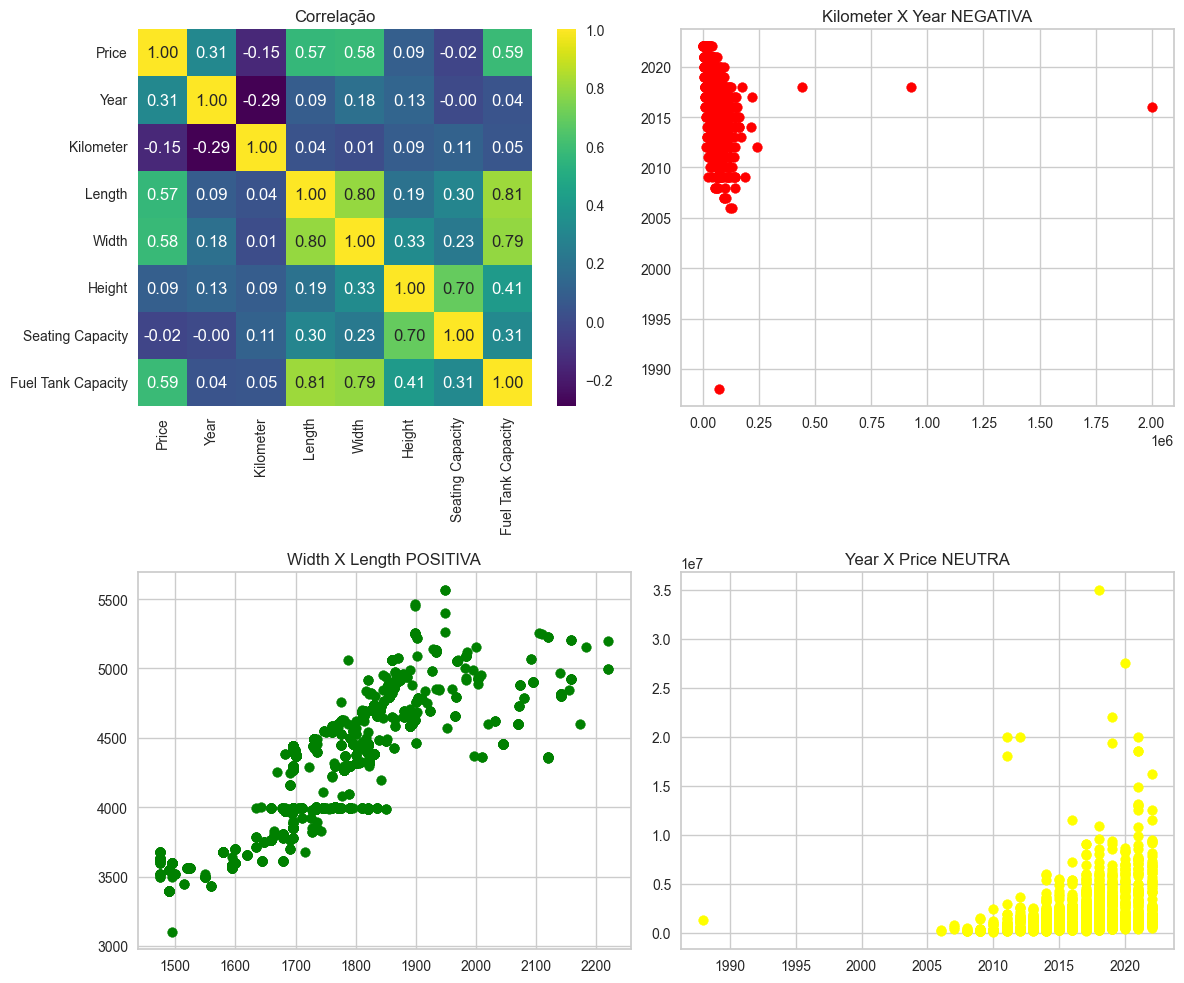

In [152]:
# Criando o layout do subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotando o heatmap de correlação
sns.heatmap(cars_numeric_corr, annot=True, fmt='.2f', cmap="viridis", ax=axs[0, 0])
axs[0, 0].set_title("Correlação")

# Plotando os gráficos de dispersão
axs[0, 1].scatter(x=cars_numeric['Kilometer'], y=cars_numeric['Year'], color='red')
axs[0, 1].set_title("Kilometer X Year NEGATIVA")

axs[1, 0].scatter(x=cars_numeric['Width'],y=cars_numeric['Length'],color='green')
axs[1, 0].set_title("Width X Length POSITIVA")

axs[1, 1].scatter(x=cars_numeric['Year'], y=cars_numeric['Price'], color='yellow')
axs[1, 1].set_title("Year X Price NEUTRA")

# Ajustando o layout
plt.tight_layout()

# Exibindo o plot
plt.show()

### Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

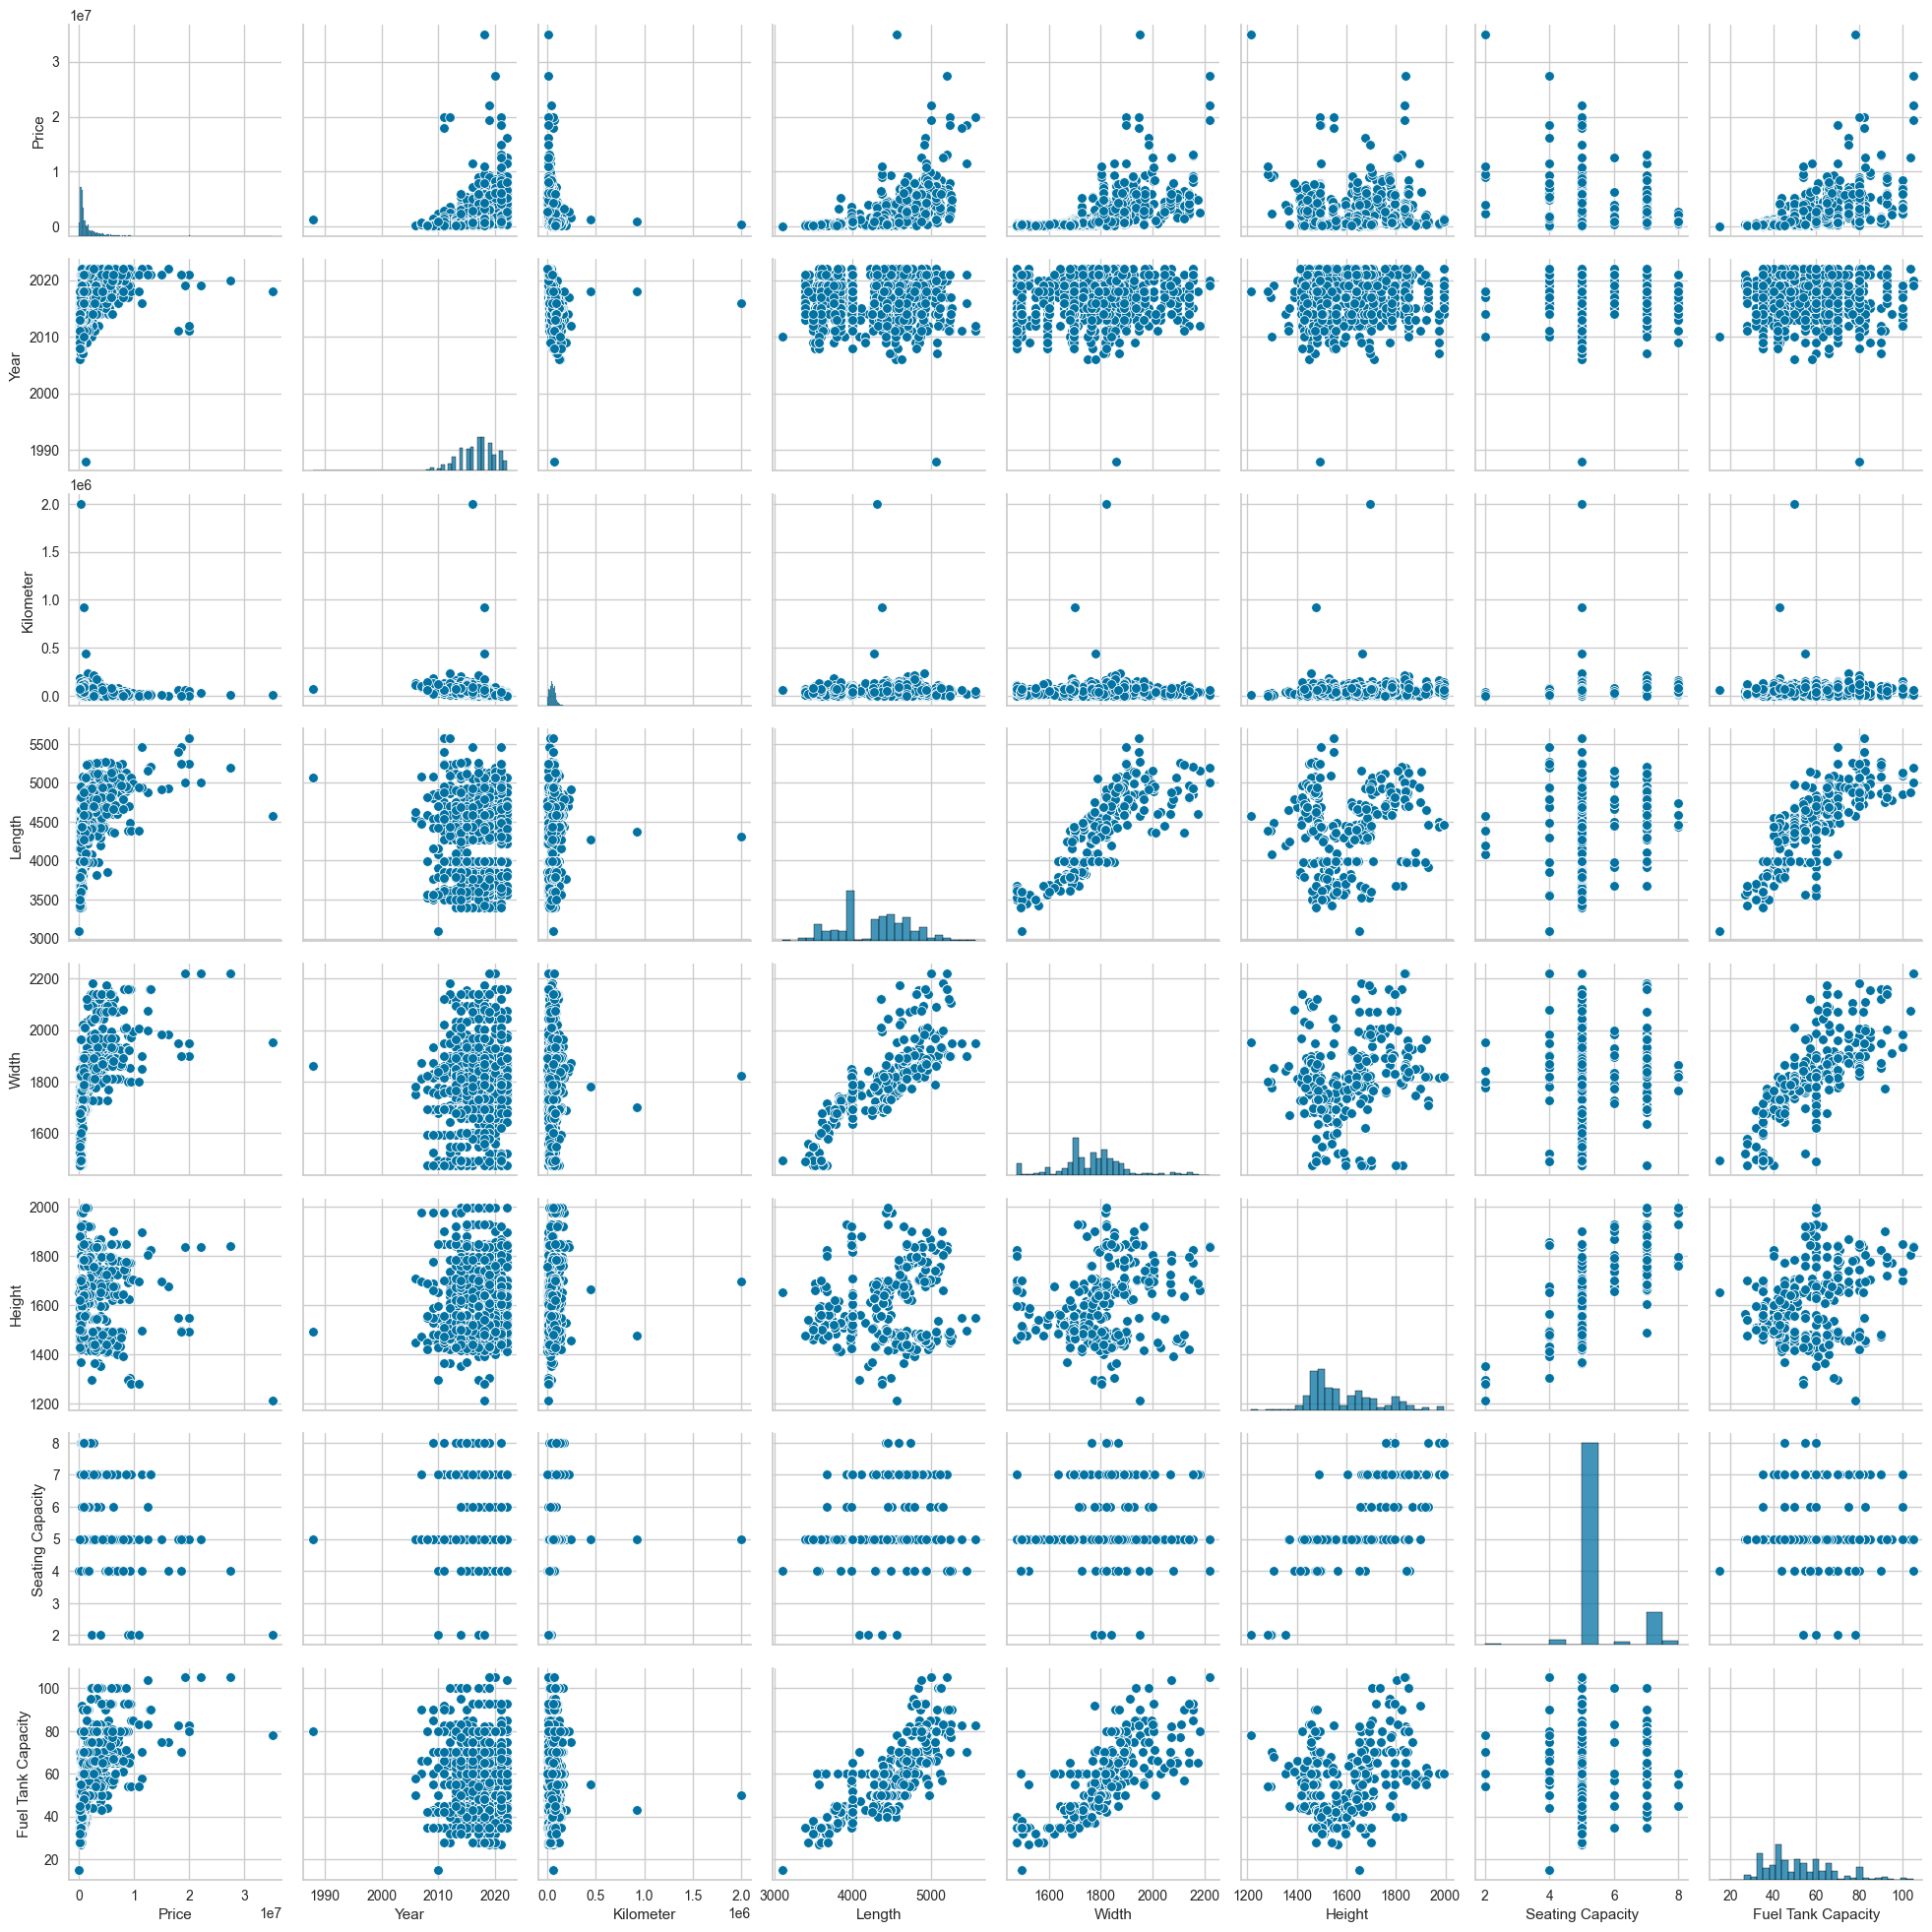

In [132]:
sns.pairplot(cars_numeric)

### Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [167]:
#Utilizando biblioteca sklearn

modelo = LinearRegression()

X = cars_numeric['Width'].values
X = X.reshape(-1, 1) # Mudança do formato de X para o formato de matriz (necessário para versões mais recentes do sklearn)

y = cars_numeric['Length']

modelo.fit(X, y)

#Interceptação
print("Interceptação: ",modelo.intercept_)

#inclinação
print("Inclinação: ",modelo.coef_)

#score R^2
print("Coeficiente de Determinação: ",modelo.score(X, y))

#Predições resultado
print("Predições resultado ",modelo.predict(X))
previsoes = modelo.predict(X)

#Predição de valor aleatório
print("Comprimento previsto para largura de 1600: ",modelo.predict([[1600]]))

Interceptação:  -399.3948149126836
Inclinação:  [2.6477424]
Coeficiente de Determinação:  0.6355725633598375
Predições resultado  [4048.81241954 4088.52855556 3823.75431542 ... 3704.60590735 4048.81241954
 4546.58799102]
Comprimento previsto para largura de 1600:  [3836.99302743]


In [161]:
#Utilizando biblioteca stats

X = sm.add_constant(cars_numeric['Width'])
y = cars_numeric['Length']

modelo = sm.OLS(y, X)
modelo_treinado = modelo.fit()
print(modelo_treinado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3265.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        22:17:08   Log-Likelihood:                -13103.
No. Observations:                1874   AIC:                         2.621e+04
Df Residuals:                    1872   BIC:                         2.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -399.3948     82.148     -4.862      0.0

<b>Concluimos que 63% da variável explicativa pode responder a variável resposta

Text(0.5, 0, 'width')

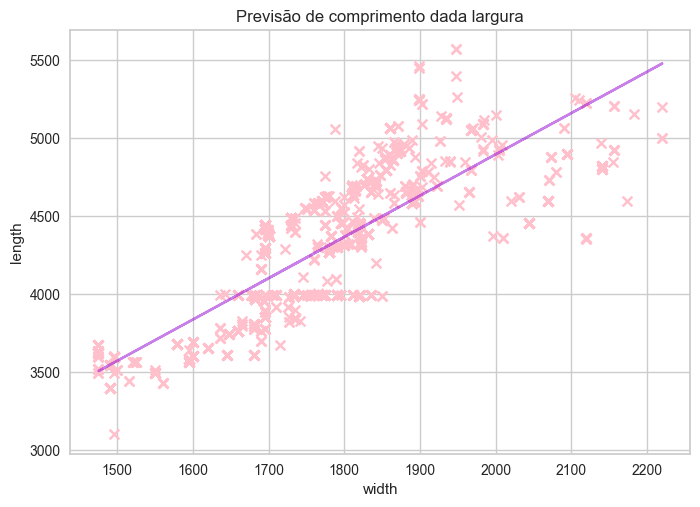

In [187]:
# Gráfico 1
plt.scatter(X, y,color='pink',marker='x')
plt.plot(X, previsoes, color = 'darkviolet',alpha=0.5)
plt.title("Previsão de comprimento dada largura")
plt.ylabel("length")
plt.xlabel("width")

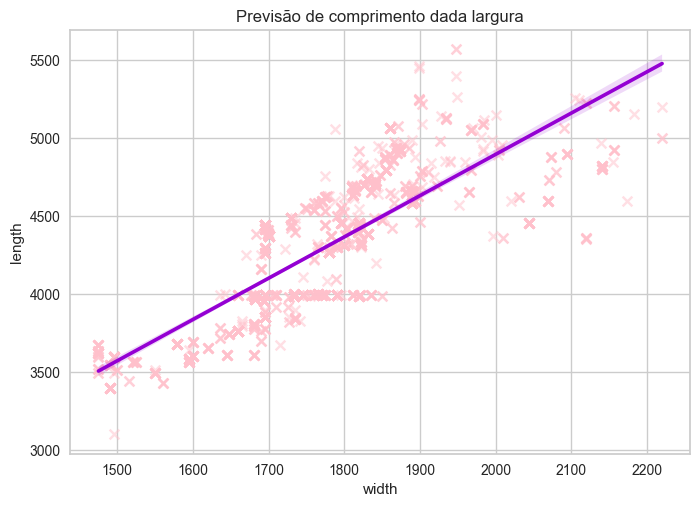

In [194]:
# Gráfico 2
plt.scatter(data=cars_numeric, x='Width', y='Length', color='pink', alpha=0.5,marker='x')
sns.regplot(data=cars_numeric, x='Width', y='Length', scatter=False, color='darkviolet')

plt.title('Previsão de comprimento dada largura')
plt.ylabel("length")
plt.xlabel("width")

plt.show()

### Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

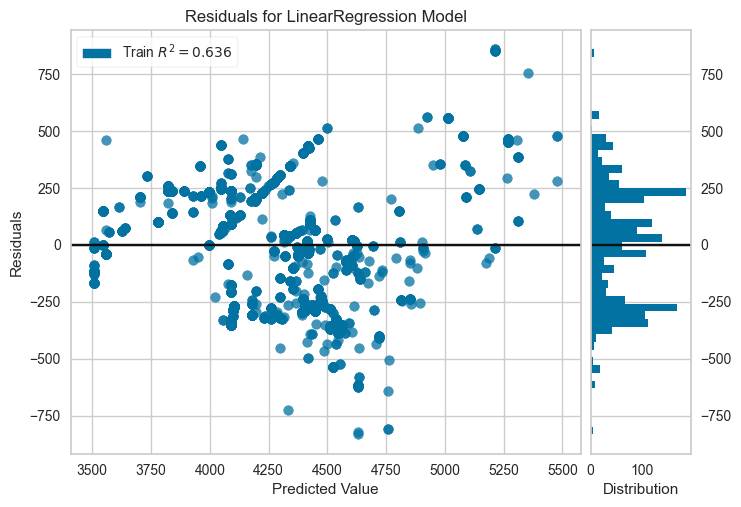

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [201]:
visualizer = ResidualsPlot(modelo)
visualizer.fit(X, y)
visualizer.show()

### Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [212]:
modelo = sm2.ols(formula="Price ~ Length + Width", data=cars_numeric)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.44e-185
Time:                        23:08:29   Log-Likelihood:                -29783.
No. Observations:                1874   AIC:                         5.957e+04
Df Residuals:                    1871   BIC:                         5.959e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.646e+07   6.07e+05    -27.132      0.0

<b>R-squared muito baixo de 0.36 

In [230]:
X = sm.add_constant(cars_numeric[['Width','Fuel Tank Capacity']])
y = cars_numeric['Length']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Length   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2420.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        23:22:07   Log-Likelihood:                -12852.
No. Observations:                1874   AIC:                         2.571e+04
Df Residuals:                    1871   BIC:                         2.573e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1105.8712     95

<b>R-squared bom 0.72

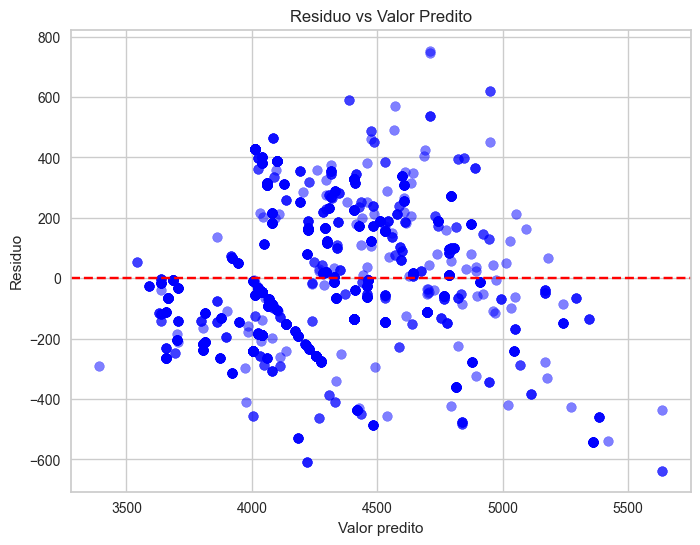

In [231]:
residuals = model.resid
# calcula ovalor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()